# 量化投资---均线策略

In [ ]:
# 量化投资---均线策略

移动平均线(MA)是股市中最常用的一种技术分析方法，用来在大行情的波动段找到有效的交易信号。移动平均线不仅简单，而且有效。据金融从业人员称，均线模型能有效地打败大部分的主观策略，是炒股、炒期货的必备基本工具。均线系统市股票市场技术分析的重要组成部分。技术分析其实的核心是统计学，通过对过往历史价格的统计和形成的统计图表来做出对未来走势的预期，并针对预期来制定交易计划。

## 移动平均线

移动平均线(MA,Moving average）是以道·琼斯的”平均成本概念”为理论基础，采用统计学中”移动平均”的原理，将一段时期内的股票价格平均值连成曲线，用来显示股价的历史波动情况，进而反映股价指数未来发展趋势的技术分析方法。它是道氏理论的形象化表述。

移动平均线的计算方法就是求连续若干天的收盘价的算术平均。天数就是MA的参数。在技术分析领域中，移动平均线是必不可少的指标工具。移动平均线利用统计学上的“移动平均”原理，将每天的市场价格进行移动平均计算，求出一个趋势值，用来作为价格走势的研判工具。

计算公式： MA = (C1+C2+C3+C4+C5+….+Cn)/n ,C为收盘价，n为移动平均周期数。

* 移动平均线依时间长短可分为三种，即短期移动平均线，中期移动平均线，长期移动平均线。短期移动平均线一般以5日或10日为计算期间，中期移动平均线大多以30日、60日为计算期间；长期移动平均线大多以100天和200天为计算期间。
* 移动均线平滑了数据序列，并有助于识别股市的发展趋势。n值越大，移动均线就越难反映序列中的短期波动，但也更好的把握了整体的趋势。

移动平均根据对数据的处理方法，又可分为3种：

* 简单移动平均线(SMA)：又称“算术移动平均线”，是指对特定期间的收盘价进行简单平均化的意思。一般所提及之移动平均线即指简单移动平均线(SMA)。

* 加权移动平均线(WMA):加权移动平均线(Weighted Moving Average 简称WMA)，是一种按时间进行加权运算的移动平均线。时间越近越近的价格，权重越大。计算方式是基于加权移动平均线日数，将每一个之前日 数比重提升。每一价格会乘以一个比重，最新的价格会有最大的比重，其之前的每一日的比重将会递减。加权移动平均线是移动平均线(MA)的改良。

* 指数平滑移动平均线(EMA):指数平滑移动平均线EXPMA(Exponential Moving Average)，为解决一旦价格已脱离均线差值扩大，而平均线未能立即反应，EXPMA可以减少类似缺点。

In [1]:
# 载入相关函数包
import numpy as np
import pandas as pd
#import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

我们使用聚宽提供的‘attribute_history’函数来获取最近一年的A股市场中国宝安（000009.XSHE）的历史交易数据：

In [6]:
# 获取中国宝安（000009.XSHE）的历史数据信息
df1 = attribute_history('000009.XSHE',count = 252,unit = '1d',\
                        fields = ['open','close', 'high', 'low',\
                         'money','avg', 'low_limit', 'factor'], df = True,\
                        skip_paused = True,\
                        fq = "post")
#df1["2019-02"]
#df1.index
df1.tail(5)

,open,close,high,low,money,avg,low_limit,factor
2019-11-25,44.94,44.84,45.14,44.24,46922840.59,44.73,40.34,10.009158
2019-11-26,45.04,44.74,45.24,44.64,34507018.86,44.85,40.34,10.009158
2019-11-27,44.84,45.04,45.24,44.54,45330356.23,44.93,40.24,10.009158
2019-11-28,45.14,44.54,45.14,44.54,34501231.04,44.73,40.54,10.009158
2019-11-29,44.74,44.74,44.84,44.24,32563374.46,44.53,40.14,10.009158


In [7]:
df1.head(5)

,open,close,high,low,money,avg,low_limit,factor
2018-11-19,47.17,44.76,47.17,44.35,5.115054e+08,45.54,41.35,8.32
2018-11-20,43.85,42.52,44.51,41.77,3.754343e+08,43.15,40.27,8.32
2018-11-21,42.10,42.43,43.51,41.93,2.565333e+08,42.71,38.27,8.32
2018-11-22,42.85,42.76,43.26,41.60,1.789161e+08,42.39,38.19,8.32
2018-11-23,42.02,39.85,42.18,39.44,2.246136e+08,40.58,38.52,8.32


#### 设置复权模式

除权除息就是指一家上市公司进行分红派息。当一家上市公司宣布年度分红派息方案并获得董事会和证监会的批准之后，即可确定股权登记日，而如果你在股权登记日（包含股权登记日那一天）后仍然持有该上市公司的股票的话，你就可以享受分红派息的权利。如果这家上市公司进行现金分红的话，那就是除息；如果是送红股或是配股的话，那就是除权；如果即现金分红有送股或配股的话，就是除权除息。

股票的分红有两种方式：分现金，或者分股票。因为分股票而向下调整股价就是除权。比如很常见的10送10、10转10，意思就是说，你持有10股，公司再送给10股，但是第二天股价也会变成原先的一半。除息呢，就是因为分给你现金了，而向下调整股价，这个就叫做除息。一般分给你多少钱，都会从股价里扣。所以第二天股价也会减少多数钱。比如某股票的分红方案为每10股派发现金红利67.87元。比如明天分红，今天持有100股，今天收盘价是400元一股，总金额是4万。那么明天分红后，10股分68元，那么100股可以能分680元。分红之后要除息的，分了多少股价是要减去多少的，每10股分68，股价就要减去6.8元，减完之总的资金并没有什么变化。

复权是指根据“除权前后流通股股东价值不变”原理，确定除权前后股价的等价换算关系。股票除权、除息之后，股价随之产生了变化，但实际成本并没有变化。这时对于股票价格，有以下三种操作：

- 不复权，即不进行前后复权操作。
- 向前复权（前复权），除权前每个交易日的交易价格换算成除权后的价格。就是保持现有价位不变，将以前的价格缩减，将除权前的K线向下平移，使图形吻合，保持股价走势的连续性。
- 向后复权（后复权），将除权后每个交易日的交易价格换算成除权前的价格。就是保持先前的价格不变，而将以后的价格增加。

以浦发银行前复权方式为例，2008年至2010年的分配方案为 

-  时间      送股   分红（每股） 
- 2010-6-10  0.3   0.15 
- 2009-6-9   0.4   0.23 
- 2008-4-24  0.3   0.16

选择以下几日的复权前的收盘价格 
- 2008-1-2    53.55 
- 2009-1-5    13.72 
- 2010-1-4    21.19 
- 2010-12-17  12.72 

对于2008-1-2(2008-1-2到2008-4-24之间的所有价格数据)的价格，需要做三次复权处理（2008年的权息调整，2009年的权息调整，2010年的权息调整） 
对于2009-1-5(2008-4-25到2009-6-9之间的所有价格数据)的价格，需要做二次复权处理（2009年的权息调整，2010年的权息调整） 
对于2010-1-4(2009-6-10到2010-6-10之间的所有价格数据)的价格，需要做一次复权处理（2010年的权息调整）

我们以2008-1-2日的复权计算为例
- 第一次调整，（53.55-0.15）/(1+0.3)=41.0769 
- 第二次调整，（41.0769-0.23）/(1+0.4)=29.1763 
- 第三次调整，（29.1763-0.16）/(1+0.3)=22.32 
第三次调整后的价格为最终复权价格。

前复权价格是由历史股票价格基于当前时间点进行前复权，历史每一天的股票数据包含了之后到当前的股票未来信息，当使用前复权参与回测时会使得回测本身包含未来价格函数，影响回测的效果。而后复权由于变动的是当前价格，会导致和实盘对接困难。目前主要使用的是动态复权（真实价格）模式。

In [15]:
#df1["2019-02-13":]

,open,close,high,low,money,avg,low_limit,factor
2019-02-13,3.66,3.79,3.81,3.64,1.280269e+08,3.76,3.29,0.831239
2019-02-14,3.80,3.79,3.87,3.76,8.926958e+07,3.80,3.41,0.831239
2019-02-15,3.80,3.84,4.00,3.77,1.463401e+08,3.89,3.41,0.831239
2019-02-18,3.86,3.96,3.97,3.86,1.342186e+08,3.92,3.46,0.831239
2019-02-19,4.04,4.06,4.22,4.00,2.222503e+08,4.10,3.56,0.831239
2019-02-20,4.06,4.01,4.06,3.97,1.208878e+08,4.00,3.66,0.831239
2019-02-21,4.01,3.99,4.11,3.97,1.296399e+08,4.03,3.61,0.831239
2019-02-22,3.99,4.11,4.13,3.96,1.472935e+08,4.06,3.59,0.831239
2019-02-25,4.21,4.37,4.38,4.17,3.429517e+08,4.29,3.71,0.831239
2019-02-26,4.37,4.31,4.49,4.29,3.029927e+08,4.38,3.93,0.831239


In [27]:
df1 = df1.loc["2019-02-13":,:]
df1.head
type(df1)
df1.index

DatetimeIndex(['2019-02-13', '2019-02-14', '2019-02-15', '2019-02-18',
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26',
               ...
               '2019-11-14', '2019-11-15', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-25',
               '2019-11-26', '2019-11-27'],
              dtype='datetime64[ns]', length=195, freq=None)

In [36]:
#df1.tail(20)
df1 = df1.loc[:"2019-11-07",:]
df1.tail(20)

,open,close,high,low,money,avg,low_limit,factor,keep,benchmark_profit,trend_profit
2019-10-11,4.64,4.65,4.68,4.58,6.357654e+07,4.63,4.18,1.0,0,0.002155,0.000000
2019-10-14,4.71,4.75,4.78,4.69,1.104638e+08,4.74,4.19,1.0,0,0.021505,0.000000
2019-10-15,4.76,4.76,4.80,4.71,9.705717e+07,4.76,4.28,1.0,1,0.002105,0.002105
2019-10-16,4.75,4.77,4.85,4.75,1.129766e+08,4.80,4.28,1.0,1,0.002101,0.002101
2019-10-17,4.80,4.72,4.80,4.70,6.414866e+07,4.74,4.29,1.0,1,-0.010482,-0.010482
2019-10-18,4.69,4.65,4.80,4.63,6.841336e+07,4.70,4.25,1.0,1,-0.014831,-0.014831
2019-10-21,4.63,4.60,4.65,4.56,5.007473e+07,4.59,4.19,1.0,0,-0.010753,-0.000000
2019-10-22,4.60,4.64,4.65,4.58,5.239967e+07,4.62,4.14,1.0,0,0.008696,0.000000
2019-10-23,4.65,4.66,4.73,4.64,6.466686e+07,4.68,4.18,1.0,0,0.004310,0.000000
2019-10-24,4.65,4.74,4.76,4.60,1.032927e+08,4.71,4.19,1.0,0,0.017167,0.000000


我们使用pandas中的rolling函数来构造5，10，30日的均线数据

In [10]:
print(type(df1['close']))

print(type(df1[['close']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
MA5  = df1[['close']].rolling(5).mean()
MA10 = df1[['close']].rolling(10).mean()
MA30 = df1[['close']].rolling(30).mean()

绘制收盘价格和不同长度的均线图之间的关系

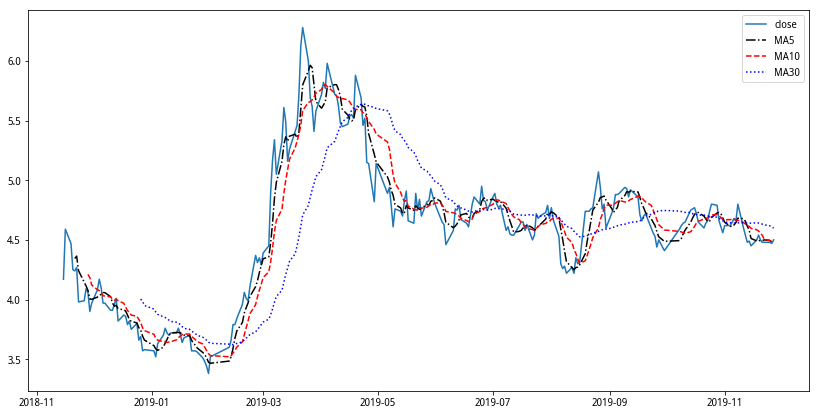

In [13]:
plt.figure(figsize = (14,7))

# 收盘价格
plt.plot(df1[['close']], label = 'close')

#5日均线，10日均线和30日均线 
plt.plot(MA5,color = 'black', ls = 'dashdot', label = 'MA5')
plt.plot(MA10,color = 'red',ls = 'dashed', label = 'MA10')
plt.plot(MA30,color = 'blue', ls = 'dotted', label = 'MA30')

plt.legend(loc = 'best')
#plt.show()

利用均线平滑的特点，可以发现均线与价格线会有交叉，各均线之间也有交叉，我们可以通过这些交叉点判断交易信号。
黄金交叉，当10日均线由下往上穿越30日均线，10日均线在上，30日均线在下，其交叉点就是黄金交叉，黄金交叉是多头的表现，出现黄金交叉后，后市会有一定的涨幅空间，这是进场的最佳时机。 死亡交叉，当30日均线与10日平均线交叉时，30日均线由下住上穿越10日平均线，形成30日平均线在上，10日均线在下时，其交点称之为”死亡交叉”，”死亡交叉”预示空头市场来临，股市将下跌此时是出场的最佳时机。 如果很好地运用移动平均线理论，再掌握行情的真正趋势，就能实现获取可观利润。
但移动平均线理论也有局限性：
移动平均线是股价定型后产生的图形，反映较慢，只适用于日间交易。
移动平均线不能反映股价在当日的变化及成交量的大小，不适用于日内交易。
移动平均线是趋势性模型，如果股价未形成趋势，只是频繁波动，模型不适用。

## 交易策略

### 交易信号

* 以股价和30日均线的交叉，进行交易信号的判断，
* 当股价上穿30日均线则买入，下穿30日均线卖出。

### 买卖方式

* 空仓入市，等待第一个交易信号出现时开始交易，
* 在买入信号出现时，一次性用完所有头寸，直到卖出信号出现，全部卖出，
* 不考虑交易成本和滑点，可以在交易信号出现的当天以收盘价买入或卖出。

### 交易信号的构建

这里我们使用np.logical_and命令来同时比较两个向量的对应元素，形成一个包含逻辑值的新的向量。

In [13]:
# 构建买入信号
buy_index = df1[np.logical_and(df1.close > MA30.close,\
                            df1.close.shift(1) < MA30.close.shift(1))].index.copy()
buy_index

DatetimeIndex(['2019-02-12', '2019-04-19', '2019-06-13', '2019-06-20',
               '2019-07-01', '2019-07-24', '2019-07-26', '2019-08-01',
               '2019-08-19', '2019-09-19', '2019-10-14', '2019-10-24',
               '2019-11-05'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# 构建卖出信号
sell_index = df1[np.logical_and(df1.close < MA30.close,\
                            df1.close.shift(1) > MA30.close.shift(1))].index.copy()
sell_index

DatetimeIndex(['2019-04-12', '2019-04-23', '2019-06-14', '2019-06-28',
               '2019-07-08', '2019-07-25', '2019-07-31', '2019-08-02',
               '2019-09-18', '2019-09-23', '2019-10-18', '2019-10-29',
               '2019-11-11'],
              dtype='datetime64[ns]', freq=None)

In [34]:
#sell_index[1:]

DatetimeIndex(['2019-04-23', '2019-06-14', '2019-07-08', '2019-07-25',
               '2019-07-31', '2019-08-02', '2019-09-18', '2019-09-23',
               '2019-10-18', '2019-10-29', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# 找出买入和卖出信号对应的观测
buy_df1 = df1.close.copy()[buy_index]
sell_df1 = df1.close.copy()[sell_index]

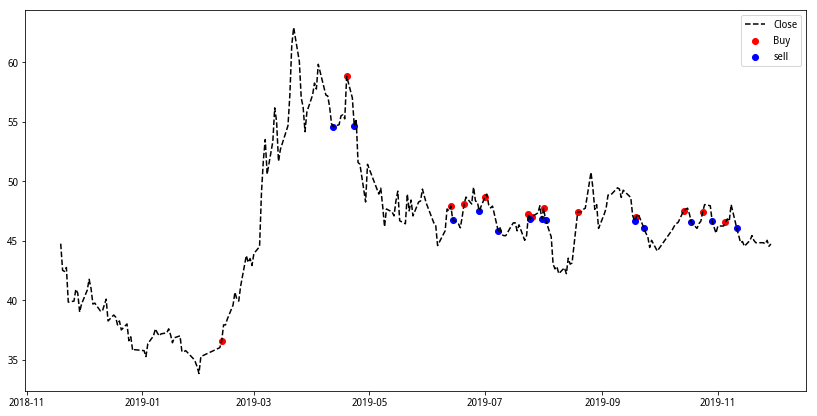

In [16]:
plt.figure(figsize = (14,7))
                     
# 测试集收盘价格线
plt.plot(df1[['close']], color = 'black', ls = 'dashed',label = 'Close')
plt.scatter(buy_df1.index,buy_df1, color = 'red',label = 'Buy')
plt.scatter(sell_df1.index,sell_df1, color = 'blue',label = 'sell')
#plt.scatter(sell_TSLA.index,sell_TSLA, color = 'blue',label = 'sell')

plt.legend(loc = 'best')
#plt.show()

### 根据交易信号构建持股状态

因为我们的假设是仓位状态只有两种，一种是空仓，一种是满仓。

In [33]:
#df2 = df1
#df2.head()

,open,close,high,low,money,avg,low_limit,factor
2018-11-14,3.78,3.79,3.89,3.74,1.113762e+08,3.81,3.41,0.831239
2018-11-15,3.82,4.17,4.17,3.82,3.701333e+08,4.10,3.41,0.831239
2018-11-16,4.16,4.59,4.59,4.05,6.712519e+08,4.45,3.76,0.831239
2018-11-19,4.71,4.47,4.71,4.43,5.115054e+08,4.55,4.13,0.831239
2018-11-20,4.38,4.25,4.45,4.17,3.754343e+08,4.31,4.02,0.831239


In [17]:
df1.loc[:,'keep'] = 0
for i in range(0,len(sell_index)):
    df1.loc[buy_index[i]:sell_index[i],'keep']=1
    df1.loc[buy_index[i],'keep']=0
df1.head(5)

,open,close,high,low,money,avg,low_limit,factor,keep
2018-11-19,47.17,44.76,47.17,44.35,5.115054e+08,45.54,41.35,8.32,0
2018-11-20,43.85,42.52,44.51,41.77,3.754343e+08,43.15,40.27,8.32,0
2018-11-21,42.10,42.43,43.51,41.93,2.565333e+08,42.71,38.27,8.32,0
2018-11-22,42.85,42.76,43.26,41.60,1.789161e+08,42.39,38.19,8.32,0
2018-11-23,42.02,39.85,42.18,39.44,2.246136e+08,40.58,38.52,8.32,0


### 计算策略收益

策略的评价是通过比较策略收益和基准策略收益的表现来进行，这里我们选择的基准策略为在回测期间一直持有股票。

In [19]:
df1['benchmark_profit'] = df1.close/df1.close.shift(1)-1

df1['trend_profit'] = df1['keep']*df1['benchmark_profit']

In [ ]:
比较策略和基准策略的单期收益序列

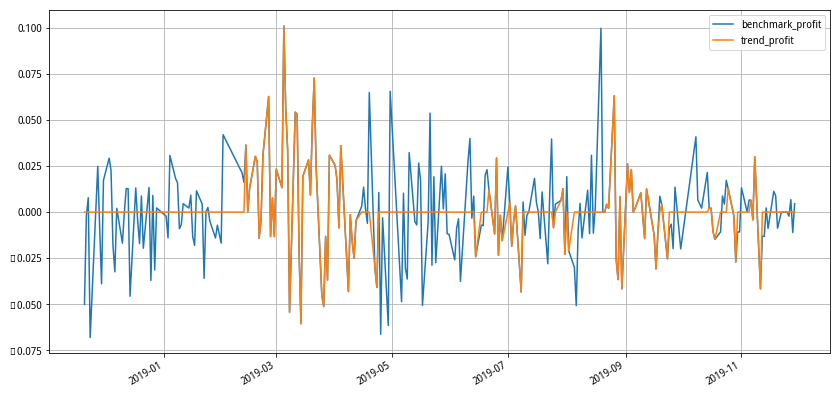

In [20]:
df1[['benchmark_profit','trend_profit']].plot(grid = True, figsize=(14,7))

In [ ]:
比较策略和基准策略的累计收益：

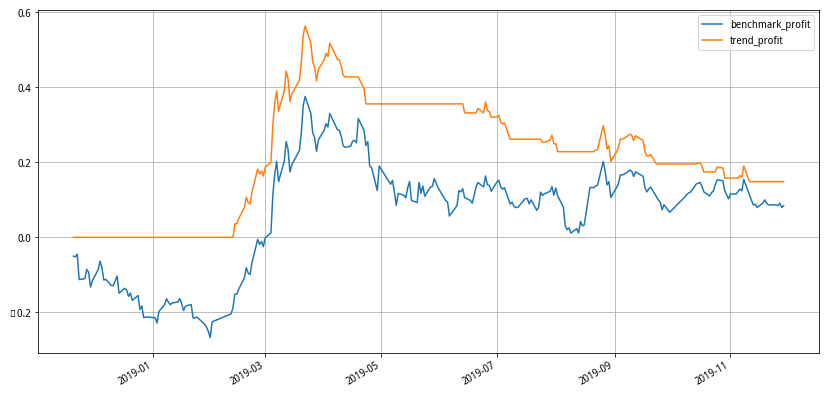

In [21]:
df1[['benchmark_profit','trend_profit']].cumsum().plot(grid = True, figsize = (14,7))